In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import missingno as msno
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题
from mpl_toolkits import mplot3d


# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#import tensorflow as tf

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
'''
## 目标是根据人口普查核实数据
### 查看数据概览
#### 分别对各个数据中的字段进行合并，并进行整理
### 单变量分析
#### 新建两个集合，分别来计算把连续变量离散化和未离散化的数据
### 特征工程,数据清洗
### 双变量分析
* 结果标签观察
* 特征清洗分析
* 特征合并
* 特征构建
### 模型建立
'''
headers = ['age', 'workclass', 'fnlwgt', 
           'education', 'education-num', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 
           'predclass']
training_raw = pd.read_csv("dataset/adult.data",names=headers,header=None)
test_raw = pd.read_csv("dataset/adult.test",names=headers,header=None)

In [4]:
training_raw.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
training_raw.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,predclass
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [6]:
test_raw.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [7]:
# 删除第一条错误数据
test_raw.drop(axis=0,index=0,inplace=True)
test_raw.age = test_raw.age.apply(np.float)
test_raw.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


## 目标是根据人口普查数据，预测年收入是否可以大于5w一年

In [8]:
# 合并进行分析
dataset_raw = training_raw.append(test_raw,ignore_index=True)
dataset_raw.age = dataset_raw.age.apply(np.int)



### 单变量分析

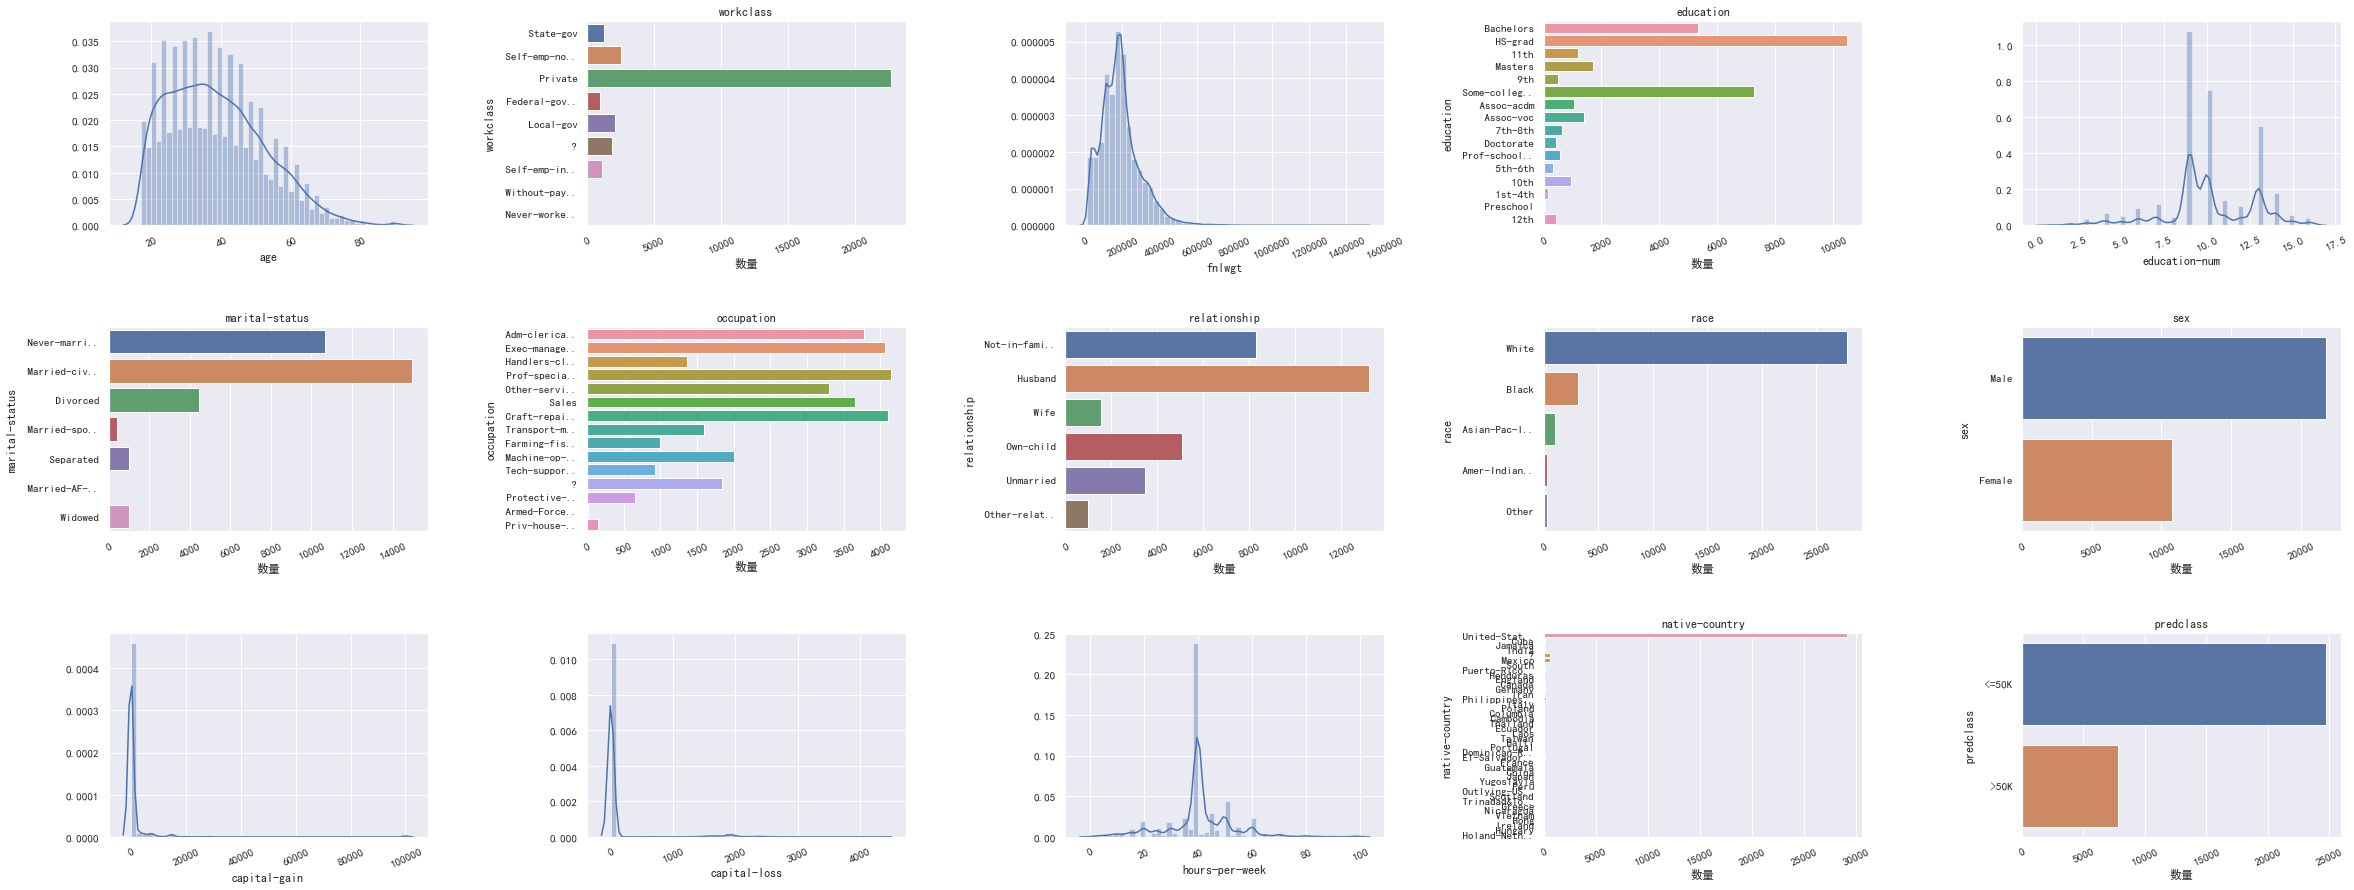

In [9]:
# 标签处理
def plot_distribution(dataset :pd.DataFrame,cols=3,width=40,height=15):
    rows = math.ceil(dataset.shape[1]/cols)
    plt.figure(figsize=(width,height))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    for index,column in enumerate(dataset.columns):
        plt.subplot(rows,cols,index+1)
        plt.xticks(rotation=25)
        if dataset[column].dtype == np.object:
            g = sns.countplot(y=column,data=training_raw)
            g.set_title(column)
            g.set_xlabel("数量")
            g.set_yticklabels([i.get_text() if len(i.get_text()) < 12 else i.get_text()[0:12]+'..' for i  in g.get_yticklabels()])
        else:
            sns.distplot(training_raw[column])



plot_distribution(dataset=dataset_raw,cols=5)

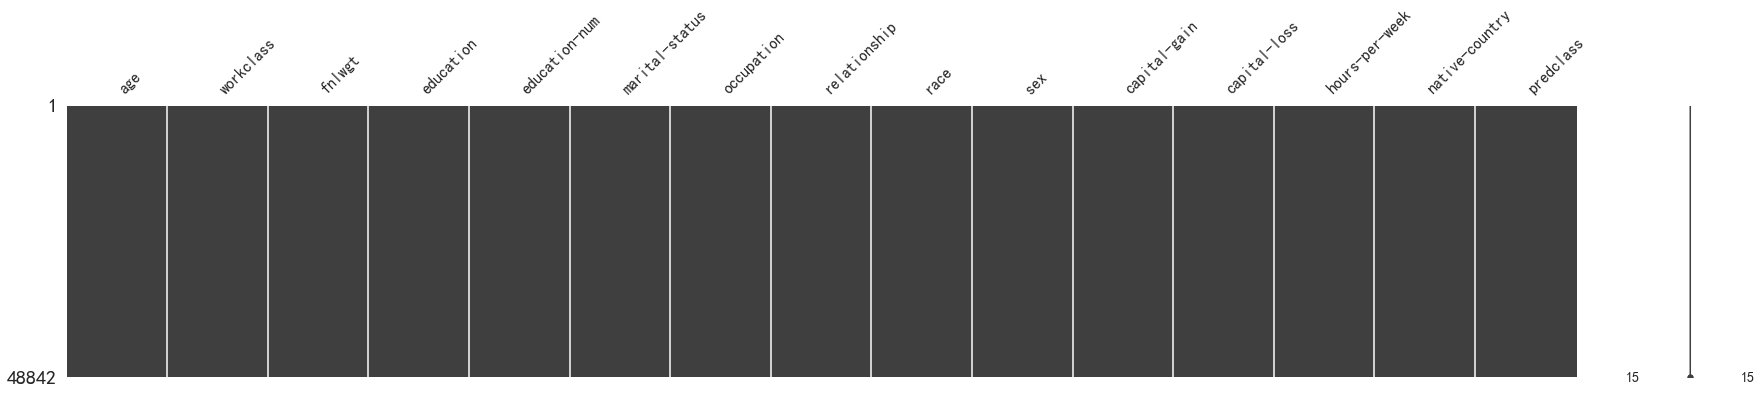

In [10]:
# 缺失值显示
msno.matrix(dataset_raw, figsize = (30,5))

#### 数据清洗
##### 清洗
* 缺失值: 对缺失值进行填充
* 特殊值: 一些错误导致的特殊值，例如 ±Inf, NA NaN
* 离群点: 这些点可能会对结果产生影响，先把它们找出来
* 错误值: 比如人的年龄不可能出现负数

##### 特征工程
* 连续变量的离散化
* 分类变量数据的合并
* 特征的降维处理
* 数据的归一化、标准化
* 构建性特征
* 特征分解: 比如将时间数据2014-09-20T20:45:40Z 转换成天，小时等信息.
* 离散化: 我们可以选择离散一些我们所拥有的连续变量，因为一些算法会执行得更快。但是会对结果产生什么样的影响呢？需要比较离散和非离散的建模结果
* dataset_bin => 连续值被离散化的数据集
* dataset_con => 非离散化的数据集
* 特征组合: 将不同的特征组合成一个新特征

##### 缺失值填充
* 均值
* 线性回归值
* 额外的数据补充: 有点难弄
* 均值填充: 这样可以不改变当前数据集整体的均值
* 回归模型预测: 建立一个回归模型去得到预测值

In [11]:
# 新建两个集合，分别来计算把连续变量离散化和未离散化的数据
# 分别对各个数据中的字段进行合并，并进行整理
# 离散变量数据集
dataset_bin = pd.DataFrame()
# 连续变量数据集
dataset_con = pd.DataFrame()

In [12]:
dataset_raw.predclass.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

###### 标签处理，大于50k的为1 小于50k的为0

In [13]:
dataset_raw.loc[dataset_raw.predclass==' <=50K','predclass'] = 0
dataset_raw.loc[dataset_raw.predclass==' <=50K.','predclass'] = 0
dataset_raw.loc[dataset_raw.predclass==' >50K','predclass'] = 1
dataset_raw.loc[dataset_raw.predclass==' >50K.','predclass'] = 1


# 离散变量数据集
dataset_bin['predclass'] = dataset_raw['predclass']
# 连续变量数据集
dataset_con['predclass']  = dataset_raw['predclass']

dataset_raw.predclass.unique()


array([0, 1], dtype=int64)

### 开始处理变量

#### age处理离散化和不离散化

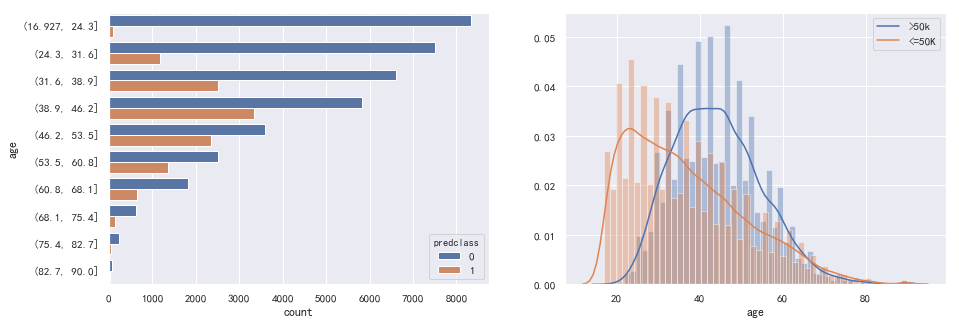

In [14]:
# 离散变量数据集
dataset_bin['age'] = pd.cut(dataset_raw['age'],10)
# 连续变量数据集
dataset_con['age']  = dataset_raw['age']


plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data=dataset_bin,y='age',hue='predclass')
plt.subplot(122)
sns.distplot(dataset_con.loc[dataset_con.predclass==1,'age'],kde_kws={"label":">50k"})
sns.distplot(dataset_con.loc[dataset_con.predclass==0,'age'],kde_kws={"label": "<=50K"})

#### 处理workclass 工种

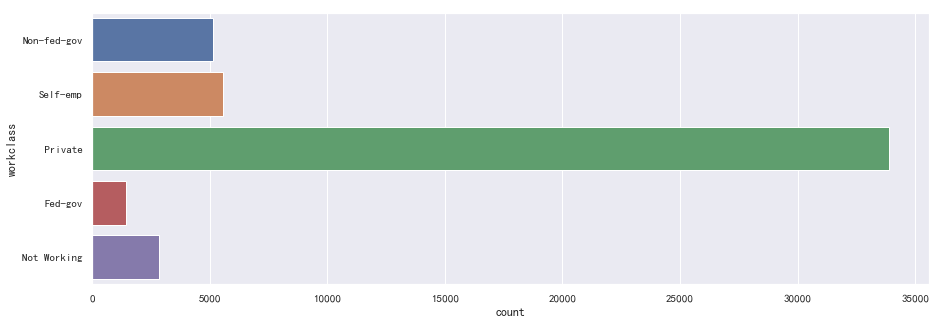

In [15]:

# sns.countplot(data=dataset_raw,y='workclass')

dataset_raw.loc[dataset_raw['workclass'] == ' Without-pay', 'workclass'] = 'Not Working'
dataset_raw.loc[dataset_raw['workclass'] == ' Never-worked', 'workclass'] = 'Not Working'
dataset_raw.loc[dataset_raw['workclass'] == ' Federal-gov', 'workclass'] = 'Fed-gov'
dataset_raw.loc[dataset_raw['workclass'] == ' State-gov', 'workclass'] = 'Non-fed-gov'
dataset_raw.loc[dataset_raw['workclass'] == ' Local-gov', 'workclass'] = 'Non-fed-gov'
dataset_raw.loc[dataset_raw['workclass'] == ' Self-emp-not-inc', 'workclass'] = 'Self-emp'
dataset_raw.loc[dataset_raw['workclass'] == ' Self-emp-inc', 'workclass'] = 'Self-emp'
dataset_raw.loc[dataset_raw['workclass'] == ' ?', 'workclass'] = 'Not Working'
dataset_raw.workclass.unique()
plt.figure(figsize=(15,5))
sns.countplot(data=dataset_raw,y='workclass')

dataset_con['workclass']=dataset_raw.workclass
dataset_bin['workclass']=dataset_raw.workclass

#### 特征: Occupation

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

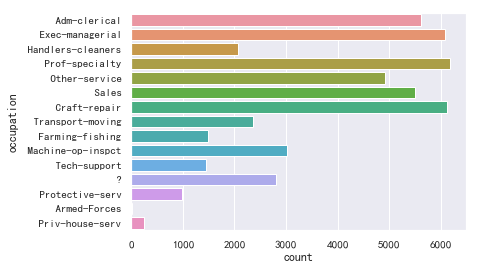

In [16]:
sns.countplot(data=dataset_raw,y='occupation')
dataset_raw.occupation.unique()

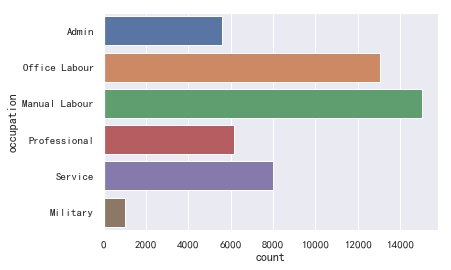

In [17]:
#  数量比较多，合并一些差不都的属性
dataset_raw.loc[dataset_raw['occupation'] == ' Adm-clerical', 'occupation'] = 'Admin'
dataset_raw.loc[dataset_raw['occupation'] == ' Armed-Forces', 'occupation'] = 'Military'
dataset_raw.loc[dataset_raw['occupation'] == ' Craft-repair', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == ' Exec-managerial', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] == ' Farming-fishing', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == ' Handlers-cleaners', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == ' Machine-op-inspct', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == ' Other-service', 'occupation'] = 'Service'
dataset_raw.loc[dataset_raw['occupation'] == ' Priv-house-serv', 'occupation'] = 'Service'
dataset_raw.loc[dataset_raw['occupation'] == ' Prof-specialty', 'occupation'] = 'Professional'
dataset_raw.loc[dataset_raw['occupation'] == ' Protective-serv', 'occupation'] = 'Military'
dataset_raw.loc[dataset_raw['occupation'] == ' Sales', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] == ' Tech-support', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] == ' Transport-moving', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == ' ?', 'occupation'] = 'Service'

sns.countplot(data=dataset_raw,y='occupation')

dataset_con['occupation']=dataset_raw.occupation
dataset_bin['occupation']=dataset_raw.occupation

##### 特征：Native Country

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

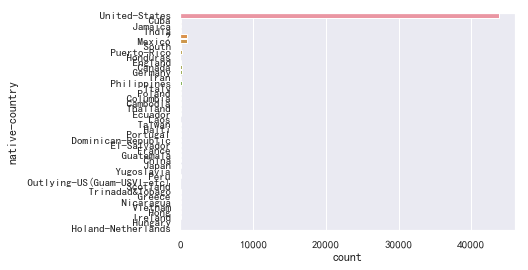

In [18]:
sns.countplot(data=dataset_raw,y='native-country')
dataset_raw['native-country'].unique()

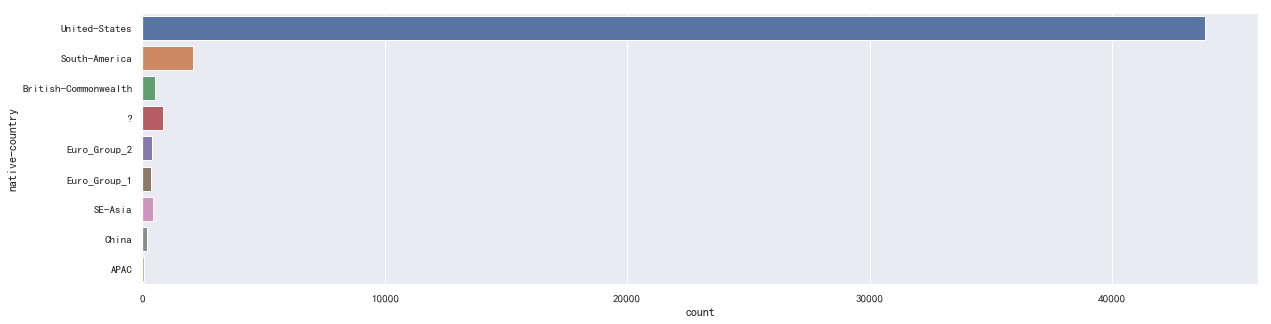

In [19]:
dataset_raw.loc[dataset_raw['native-country'] == ' Cambodia'                    , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == ' Canada'                      , 'native-country'] = 'British-Commonwealth'    
dataset_raw.loc[dataset_raw['native-country'] == ' China'                       , 'native-country'] = 'China'       
dataset_raw.loc[dataset_raw['native-country'] == ' Columbia'                    , 'native-country'] = 'South-America'    
dataset_raw.loc[dataset_raw['native-country'] == ' Cuba'                        , 'native-country'] = 'South-America'        
dataset_raw.loc[dataset_raw['native-country'] == ' Dominican-Republic'          , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == ' Ecuador'                     , 'native-country'] = 'South-America'     
dataset_raw.loc[dataset_raw['native-country'] == ' El-Salvador'                 , 'native-country'] = 'South-America' 
dataset_raw.loc[dataset_raw['native-country'] == ' England'                     , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == ' France'                      , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == ' Germany'                     , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == ' Greece'                      , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == ' Guatemala'                   , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == ' Haiti'                       , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == ' Holand-Netherlands'          , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == ' Honduras'                    , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == ' Hong'                        , 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] == ' Hungary'                     , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == ' India'                       , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == ' Iran'                        , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == ' Ireland'                     , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == ' Italy'                       , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == ' Jamaica'                     , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == ' Japan'                       , 'native-country'] = 'APAC'
dataset_raw.loc[dataset_raw['native-country'] == ' Laos'                        , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == ' Mexico'                      , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == ' Nicaragua'                   , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == ' Outlying-US(Guam-USVI-etc)'  , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == ' Peru'                        , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == ' Philippines'                 , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == ' Poland'                      , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == ' Portugal'                    , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == ' Puerto-Rico'                 , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == ' Scotland'                    , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == ' South'                       , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == ' Taiwan'                      , 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] == ' Thailand'                    , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == ' Trinadad&Tobago'             , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == ' United-States'               , 'native-country'] = 'United-States'
dataset_raw.loc[dataset_raw['native-country'] == ' Vietnam'                     , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == ' Yugoslavia'                  , 'native-country'] = 'Euro_Group_2'

dataset_bin['native-country'] = dataset_raw['native-country']
dataset_con['native-country'] = dataset_raw['native-country']
plt.figure(figsize=(20,5))
sns.countplot(data=dataset_raw,y='native-country')

#### 特征：Education

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

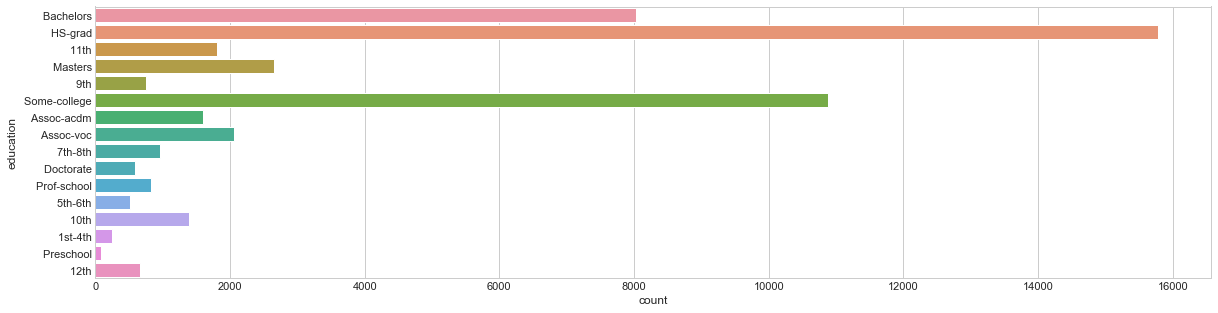

In [20]:
# 教育也进行合并
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
sns.countplot(y="education", data=dataset_raw)
dataset_raw.education.unique()

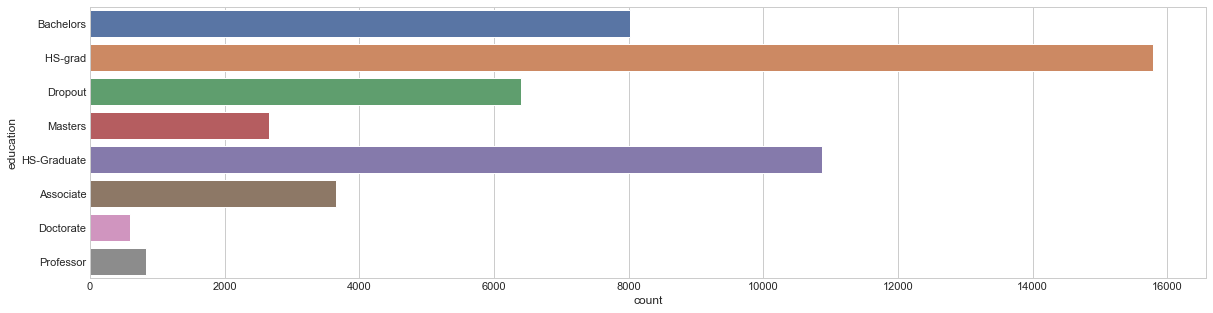

In [21]:
dataset_raw.loc[dataset_raw['education'] == ' 10th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == ' 11th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == ' 12th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == ' 1st-4th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == ' 5th-6th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == ' 7th-8th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == ' 9th'           , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == ' Assoc-acdm'    , 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] == ' Assoc-voc'     , 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] == ' Bachelors'     , 'education'] = 'Bachelors'
dataset_raw.loc[dataset_raw['education'] == ' Doctorate'     , 'education'] = 'Doctorate'
dataset_raw.loc[dataset_raw['education'] == ' HS-Grad'       , 'education'] = 'HS-Graduate'
dataset_raw.loc[dataset_raw['education'] == ' Masters'       , 'education'] = 'Masters'
dataset_raw.loc[dataset_raw['education'] == ' Preschool'     , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == ' Prof-school'   , 'education'] = 'Professor'
dataset_raw.loc[dataset_raw['education'] == ' Some-college'  , 'education'] = 'HS-Graduate'

dataset_bin['education'] = dataset_raw['education']
dataset_con['education'] = dataset_raw['education']
plt.figure(figsize=(20,5)) 
sns.countplot(y="education", data=dataset_raw)

#### 特征： Marital Status

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

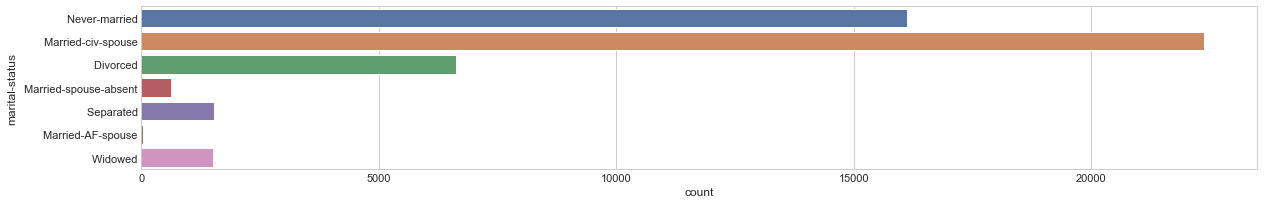

In [22]:
# 婚姻状况
plt.figure(figsize=(20,3)) 
sns.countplot(y="marital-status", data=dataset_raw);
dataset_raw['marital-status'].unique()

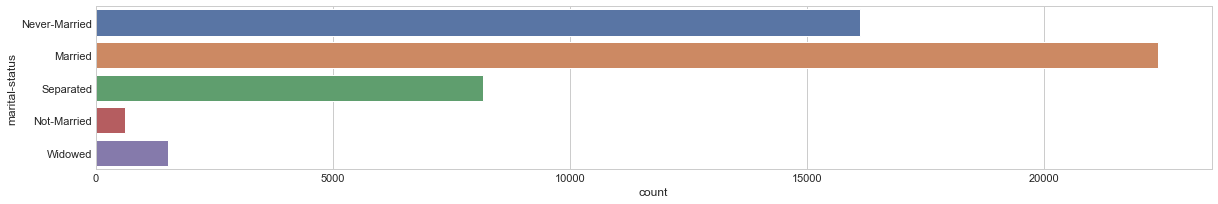

In [23]:
dataset_raw.loc[dataset_raw['marital-status'] == ' Never-married'        , 'marital-status'] = 'Never-Married'
dataset_raw.loc[dataset_raw['marital-status'] == ' Married-AF-spouse'    , 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] == ' Married-civ-spouse'   , 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] == ' Married-spouse-absent', 'marital-status'] = 'Not-Married'
dataset_raw.loc[dataset_raw['marital-status'] == ' Separated'            , 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status'] == ' Divorced'             , 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status'] == ' Widowed'              , 'marital-status'] = 'Widowed'

dataset_bin['marital-status'] = dataset_raw['marital-status']
dataset_con['marital-status'] = dataset_raw['marital-status']

plt.figure(figsize=(20,3)) 
sns.countplot(y="marital-status", data=dataset_raw)


#### 特征： Final Weight

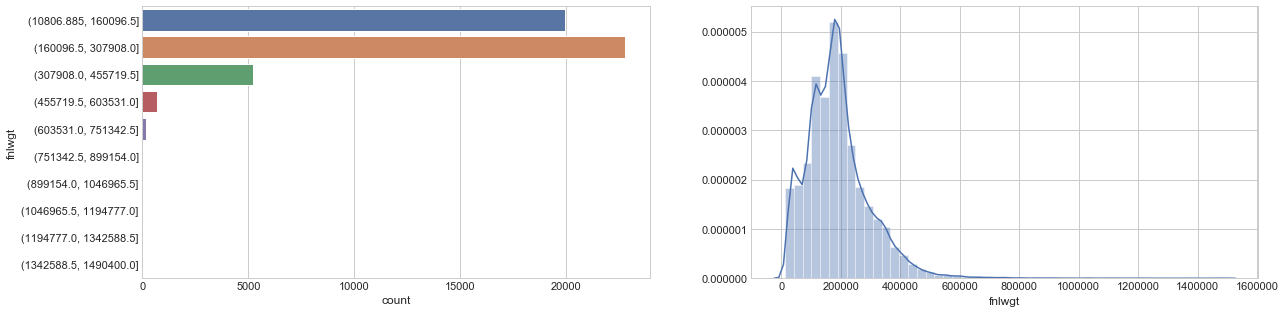

In [24]:
# 同样分成10份
dataset_bin['fnlwgt'] = pd.cut(dataset_raw['fnlwgt'], 10)
dataset_con['fnlwgt'] = dataset_raw['fnlwgt']

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(y="fnlwgt", data=dataset_bin)
plt.subplot(122)
sns.distplot(dataset_con['fnlwgt'])

####   特征：受教育的Education Number

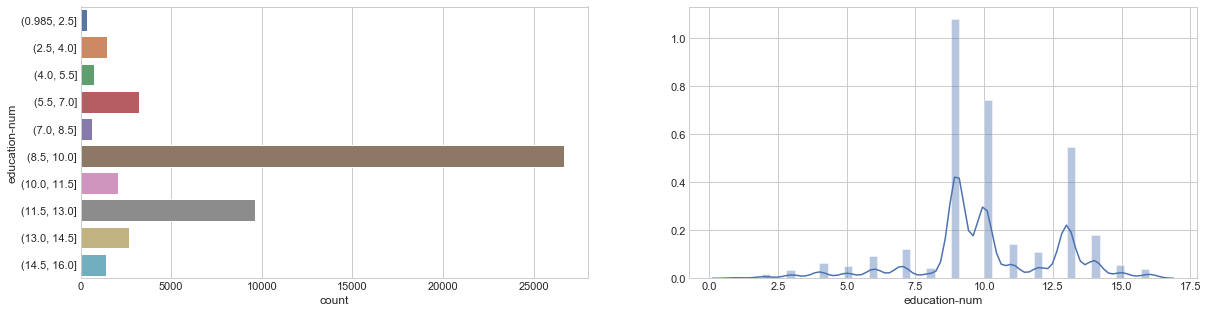

In [25]:
dataset_bin['education-num'] = pd.cut(dataset_raw['education-num'], 10)
dataset_con['education-num'] = dataset_raw['education-num']
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(y='education-num',data=dataset_bin)
plt.subplot(122)
sns.distplot(dataset_con['education-num'])

#### 特征： Hours per Week

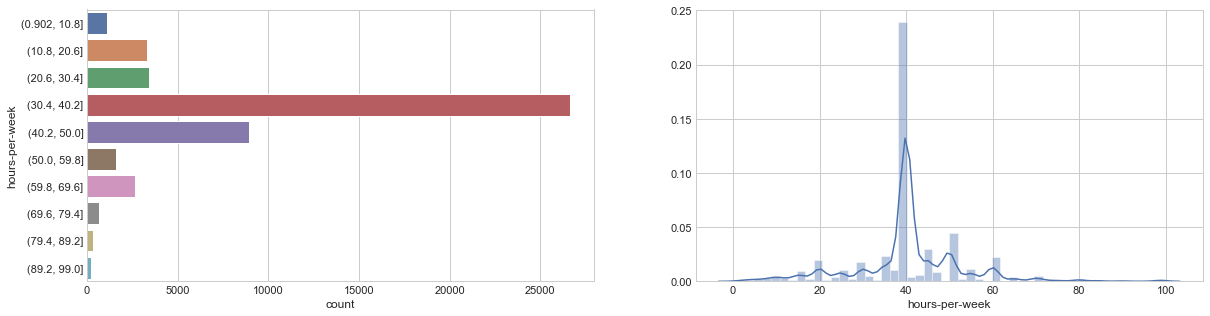

In [26]:
dataset_bin['hours-per-week'] = pd.cut(dataset_raw['hours-per-week'], 10)
dataset_con['hours-per-week'] = dataset_raw['hours-per-week']

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(y="hours-per-week", data=dataset_bin)
plt.subplot(122)
sns.distplot(dataset_con['hours-per-week'])

#### 特征： 资本增益

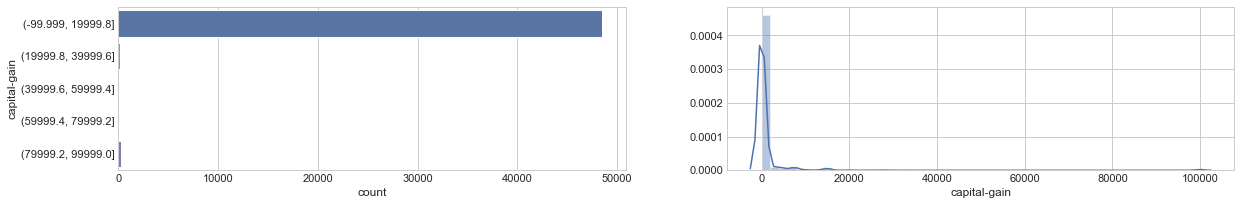

In [27]:
#资本增益
dataset_bin['capital-gain'] = pd.cut(dataset_raw['capital-gain'], 5)
dataset_con['capital-gain'] = dataset_raw['capital-gain']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,3)) 
plt.subplot(1, 2, 1)
sns.countplot(y="capital-gain", data=dataset_bin)
plt.subplot(1, 2, 2)
sns.distplot(dataset_con['capital-gain'])

#### 特征：资本损失

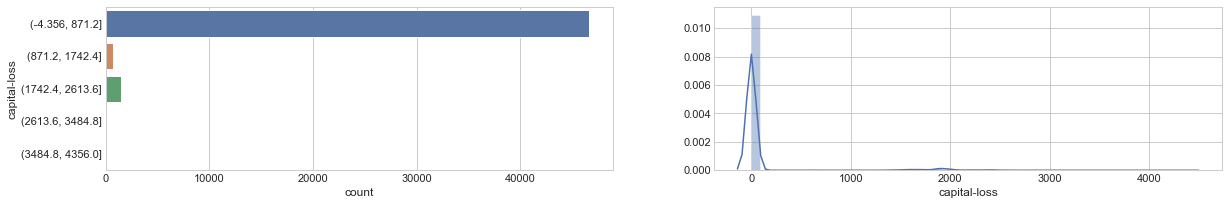

In [28]:
# 资本损失
dataset_bin['capital-loss'] = pd.cut(dataset_raw['capital-loss'], 5)
dataset_con['capital-loss'] = dataset_raw['capital-loss']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,3)) 
plt.subplot(1, 2, 1)
sns.countplot(y="capital-loss", data=dataset_bin)
plt.subplot(1, 2, 2)
sns.distplot(dataset_con['capital-loss'])

#### 剩余的特征：sex，race，relationship

In [29]:
# 这些就直接用了
dataset_con['sex'] = dataset_bin['sex'] = dataset_raw['sex']
dataset_con['race'] = dataset_bin['race'] = dataset_raw['race']
dataset_con['relationship'] = dataset_bin['relationship'] = dataset_raw['relationship']

### 双变量分析
看特征之间的相互关系（分类变量）

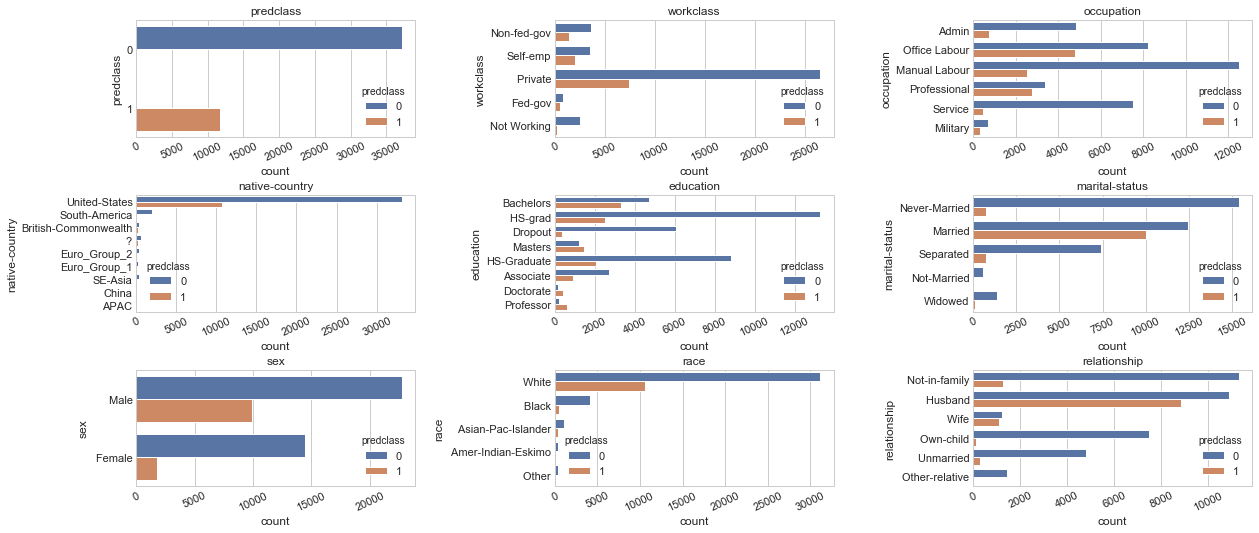

In [30]:
def plot_bivariate_bar(dataset :pd.DataFrame,hue,cols=3,width=20,height=15):
    rows = math.ceil(dataset.shape[1]/cols)
    plt.figure(figsize=(width,height))
    plt.style.use('seaborn-whitegrid')
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    dataset = dataset.select_dtypes(include='object')
    for index,column in enumerate(dataset.columns):
        plt.subplot(rows,cols,index+1)
        plt.xticks(rotation=25)
        if np.object == dataset.dtypes[column]:
            g = sns.countplot(y=column,data=dataset,hue=hue)
            g.set_title(column)
# dataset_con.describe()
dataset_con['predclass'] = dataset_con['predclass'].astype(np.object)
dataset_bin['predclass'] = dataset_con['predclass'].astype(np.object)
plot_bivariate_bar(dataset_con,hue='predclass')
# dataset_con[['predclass','age','fnlwgt','hours-per-week','capital-gain','capital-loss']]
# dataset_con.dtypes
# 

In [31]:
dataset_con.describe()

,age,fnlwgt,education-num,hours-per-week,capital-gain,capital-loss
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,40.422382,1079.067626,87.502314
std,13.710510,1.056040e+05,2.570973,12.391444,7452.019058,403.004552
min,17.000000,1.228500e+04,1.000000,1.000000,0.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,40.000000,0.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,40.000000,0.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,45.000000,0.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99.000000,99999.000000,4356.000000


##### 使用箱体图，查看不同的婚姻情况，教育多少与收入的关系

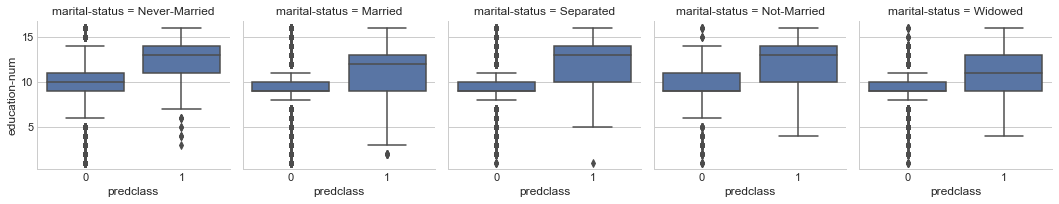

In [32]:
g = sns.FacetGrid(data=dataset_con,col='marital-status')
g.map(sns.boxplot,'predclass','education-num')

#### 性别、教育、年龄对收入的影响

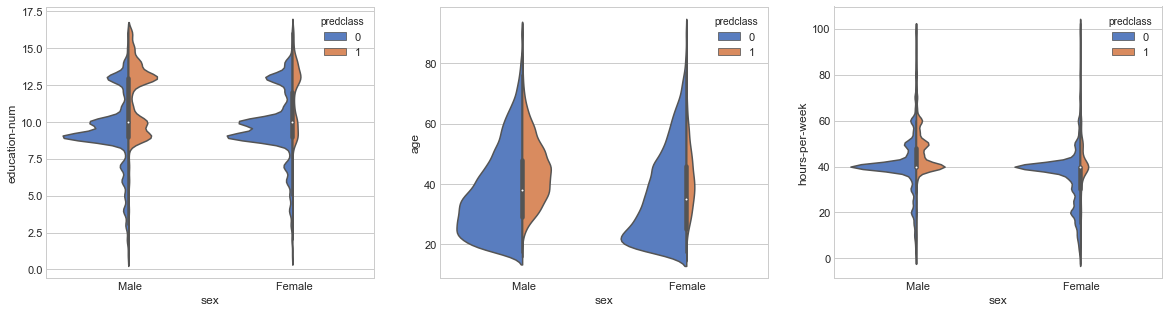

In [33]:
# 性别，收入
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.violinplot(data=dataset_raw,x='sex',y='education-num',hue='predclass',palette="muted",split=True,scale='count')
plt.subplot(132)
sns.violinplot(data=dataset_raw,x='sex',y='age',hue='predclass',palette="muted",split=True,scale='count')
plt.subplot(133)
sns.violinplot(data=dataset_raw,x='sex',y='hours-per-week',hue='predclass',palette="muted",split=True,scale='count')

####  不同图像之间的散点图 
https://www.cnblogs.com/xxtalhr/p/10859517.html 介绍seaborn画图的

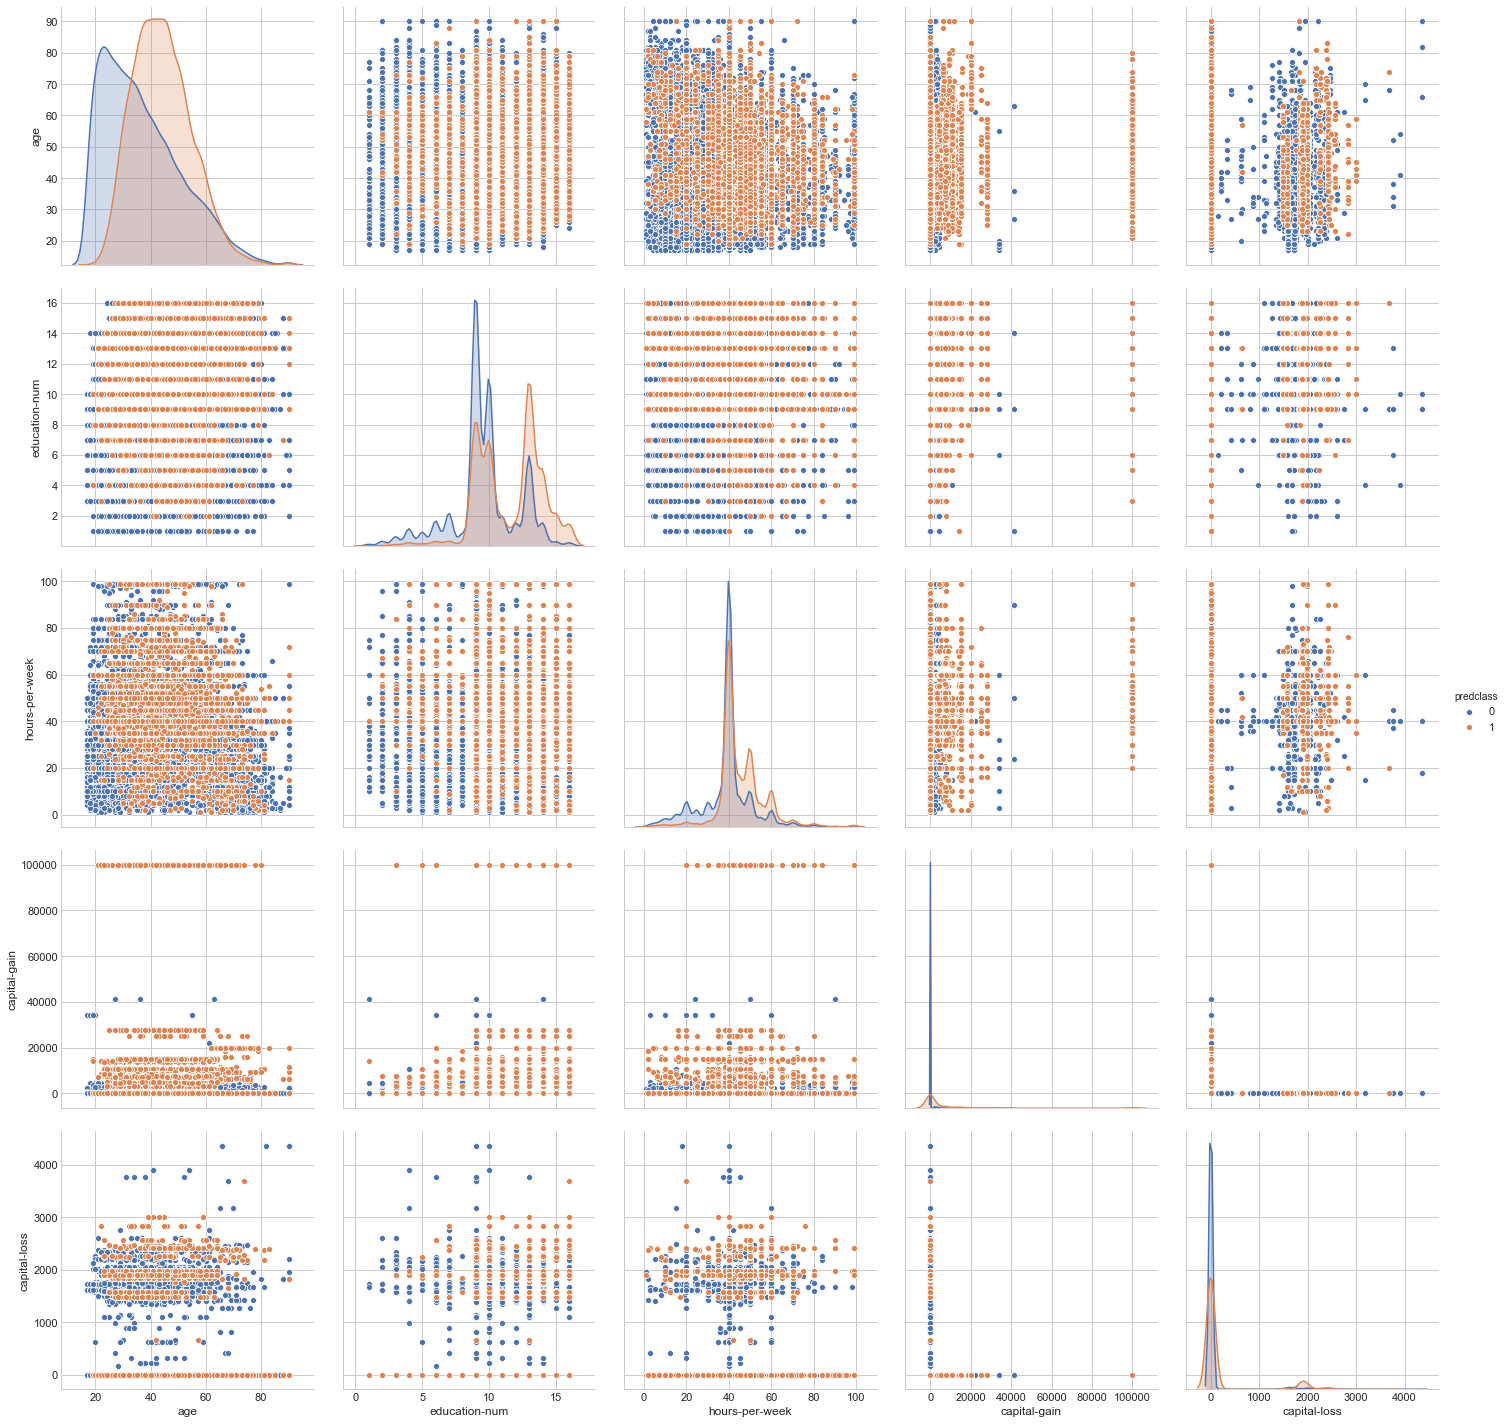

In [34]:
# 不同特征之间的散点图分布
# https://www.cnblogs.com/xxtalhr/p/10859517.html 介绍
# seaborn常用命令
#【1】set_style()是用来设置主题的，Seaborn有5个预设好的主题：darkgrid、whitegrid、dark、white、ticks，默认为darkgrid
#【2】set()通过设置参数可以用来设置背景，调色板等，更加常用
#【3】displot()为hist加强版
#【4】kdeplot()为密度曲线图
#【5】boxplot()为箱图
#【6】joinplot()联合分布图
#【7】heatmap()热点图
#【8】pairplot()多变量图，可以支持各种类型的变量分析，是特征分析很好用的工具
# data：必不可少的数据；hue：用一个特征来显示图像上的颜色，类似于打标签；vars:只留几个特征两两比较，否则使用data的全部变量；
g = sns.pairplot(data= dataset_raw[['age','education-num','hours-per-week','capital-gain','capital-loss','predclass']],
             hue='predclass',vars=dataset_raw[['age','education-num','hours-per-week','capital-gain','capital-loss','predclass']].columns[:-1],
             size=4);

#### 创建新的变量 Age + Hours Per Week

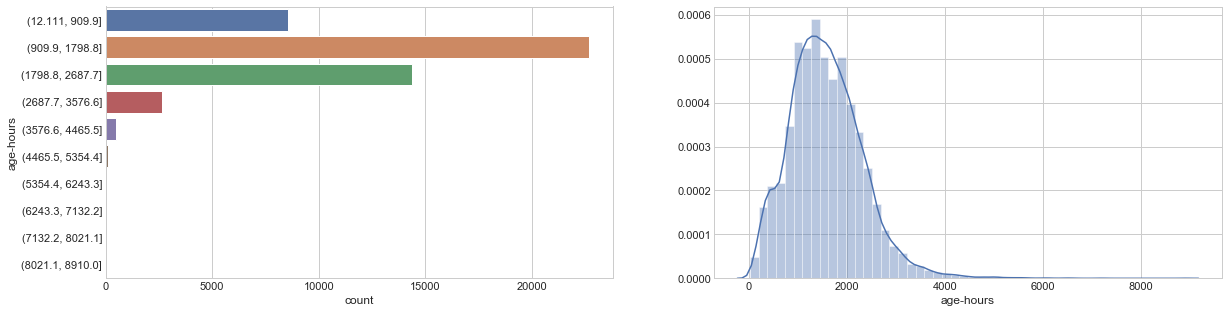

In [35]:
# 工作年限+每周工作时长
dataset_raw['age-hours'] = dataset_raw['age']*dataset_raw['hours-per-week']
dataset_bin['age-hours'] = pd.cut(dataset_raw['age-hours'],10)
dataset_con['age-hours'] = dataset_raw['age-hours']

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data=dataset_bin,y='age-hours')
plt.subplot(122)
sns.distplot(dataset_con['age-hours'])

#### 创建性别和婚姻的新变量

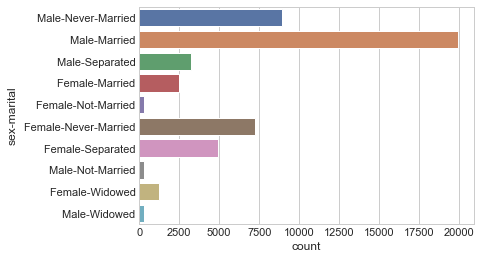

In [36]:
dataset_con['sex-marital']  = dataset_con['sex']+'-'+dataset_con['marital-status']
dataset_bin['sex-marital']  = dataset_con['sex']+'-'+dataset_con['marital-status']
sns.countplot(data=dataset_bin,y='sex-marital')

### 特征工程-特征编码
#### one-hot编码


In [37]:

dataset_bin_columns = dataset_bin.columns.tolist()
dataset_bin_columns.remove('predclass')
dataset_bin_enc = pd.get_dummies(dataset_bin,columns=dataset_bin_columns)
dataset_bin_enc.head()

,predclass,"age_(16.927, 24.3]","age_(24.3, 31.6]","age_(31.6, 38.9]","age_(38.9, 46.2]","age_(46.2, 53.5]","age_(53.5, 60.8]","age_(60.8, 68.1]","age_(68.1, 75.4]","age_(75.4, 82.7]",...,sex-marital_ Female-Married,sex-marital_ Female-Never-Married,sex-marital_ Female-Not-Married,sex-marital_ Female-Separated,sex-marital_ Female-Widowed,sex-marital_ Male-Married,sex-marital_ Male-Never-Married,sex-marital_ Male-Not-Married,sex-marital_ Male-Separated,sex-marital_ Male-Widowed
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [38]:
# Label Encode 
dataset_con_test = dataset_con
dataset_con_test.head()
dataset_con_test['workclass'] = dataset_con['workclass'].factorize()[0]
dataset_con_test['occupation'] = dataset_con['occupation'].factorize()[0]
dataset_con_test['native-country'] = dataset_con['native-country'].factorize()[0]

dataset_con_enc = dataset_con_test.apply(LabelEncoder().fit_transform)

dataset_con_enc.head()

,predclass,age,workclass,occupation,native-country,education,marital-status,fnlwgt,education-num,hours-per-week,capital-gain,capital-loss,sex,race,relationship,age-hours,sex-marital
0,0,22,0,0,0,2,1,3461,12,39,27,0,1,4,1,695,6
1,0,33,1,1,0,2,0,3788,12,12,0,0,1,4,0,334,5
2,0,21,2,2,0,0,3,18342,8,39,0,0,1,4,1,683,8
3,0,36,2,2,0,4,0,19995,6,39,0,0,1,2,0,890,5
4,0,11,2,3,1,2,0,25405,12,39,0,0,0,2,5,530,0


In [40]:
dataset_bin_enc.corr()

,"age_(16.927, 24.3]","age_(24.3, 31.6]","age_(31.6, 38.9]","age_(38.9, 46.2]","age_(46.2, 53.5]","age_(53.5, 60.8]","age_(60.8, 68.1]","age_(68.1, 75.4]","age_(75.4, 82.7]","age_(82.7, 90.0]",...,sex-marital_ Female-Married,sex-marital_ Female-Never-Married,sex-marital_ Female-Not-Married,sex-marital_ Female-Separated,sex-marital_ Female-Widowed,sex-marital_ Male-Married,sex-marital_ Male-Never-Married,sex-marital_ Male-Not-Married,sex-marital_ Male-Separated,sex-marital_ Male-Widowed
"age_(16.927, 24.3]",1.000000,-0.212449,-0.218878,-0.219424,-0.170378,-0.134113,-0.105109,-0.058079,-0.034498,-0.020272,...,-0.060774,0.336277,-0.011353,-0.126661,-0.072821,-0.319532,0.341694,-0.024649,-0.104141,-0.032151
"age_(24.3, 31.6]",-0.212449,1.000000,-0.222852,-0.223408,-0.173471,-0.136548,-0.107018,-0.059133,-0.035125,-0.020640,...,0.013961,0.078209,0.006765,-0.044446,-0.068361,-0.096536,0.129754,-0.002388,-0.029642,-0.030710
"age_(31.6, 38.9]",-0.218878,-0.222852,1.000000,-0.230168,-0.178721,-0.140680,-0.110256,-0.060923,-0.036188,-0.021264,...,0.025785,-0.061259,0.000157,0.021636,-0.061370,0.066517,-0.052901,0.006149,0.035237,-0.031191
"age_(38.9, 46.2]",-0.219424,-0.223408,-0.230168,1.000000,-0.179166,-0.141031,-0.110531,-0.061074,-0.036278,-0.021317,...,0.023391,-0.114446,-0.001330,0.080843,-0.037843,0.108465,-0.136360,0.011797,0.069068,-0.021649
"age_(46.2, 53.5]",-0.170378,-0.173471,-0.178721,-0.179166,1.000000,-0.109507,-0.085825,-0.047423,-0.028169,-0.016552,...,0.012775,-0.115501,0.007054,0.065510,0.014914,0.118760,-0.135718,0.010345,0.035322,-0.000662
"age_(53.5, 60.8]",-0.134113,-0.136548,-0.140680,-0.141031,-0.109507,1.000000,-0.067557,-0.037329,-0.022173,-0.013029,...,0.000758,-0.095794,0.003732,0.028561,0.075884,0.103109,-0.115817,-0.001597,0.018771,0.033200
"age_(60.8, 68.1]",-0.105109,-0.107018,-0.110256,-0.110531,-0.085825,-0.067557,1.000000,-0.029256,-0.017378,-0.010211,...,-0.014425,-0.076548,-0.005106,-0.005287,0.175592,0.080989,-0.093805,-0.003800,-0.013370,0.063557
"age_(68.1, 75.4]",-0.058079,-0.059133,-0.060923,-0.061074,-0.047423,-0.037329,-0.029256,1.000000,-0.009602,-0.005642,...,-0.012500,-0.045568,-0.001740,-0.012741,0.158959,0.033049,-0.050687,0.003720,-0.018698,0.074048
"age_(75.4, 82.7]",-0.034498,-0.035125,-0.036188,-0.036278,-0.028169,-0.022173,-0.017378,-0.009602,1.000000,-0.003352,...,-0.012616,-0.026840,0.004423,-0.017167,0.095606,0.013359,-0.029291,0.007263,-0.013519,0.126662
"age_(82.7, 90.0]",-0.020272,-0.020640,-0.021264,-0.021317,-0.016552,-0.013029,-0.010211,-0.005642,-0.003352,1.000000,...,-0.006127,-0.006757,-0.003512,-0.005667,0.034115,-0.003890,-0.002983,0.002068,-0.008092,0.069432


## 特征选择

特征多并不代表都是好用的，咱们得来挑一挑，哪些比较有价值，这样才给他留下来

* **降维:**
    - **主成分分析 (PCA):** 降维最常用的手段，需要指定基坐标系，然后变换到指定的维度
    - **奇异值分解(SVD):** 找出来有具有特定含义的特征
    - **线性判别分析(LDA):** 拿到最适合分类的特征空间


- **特征重要性/相关性:**
    - **筛选:** 找出来哪些对结果最能产生影响的特正门
    - **评估子集:** 用部分特征数据进行实验
    - **集成方法:** 类似随机森林

### 特征变量的相关性

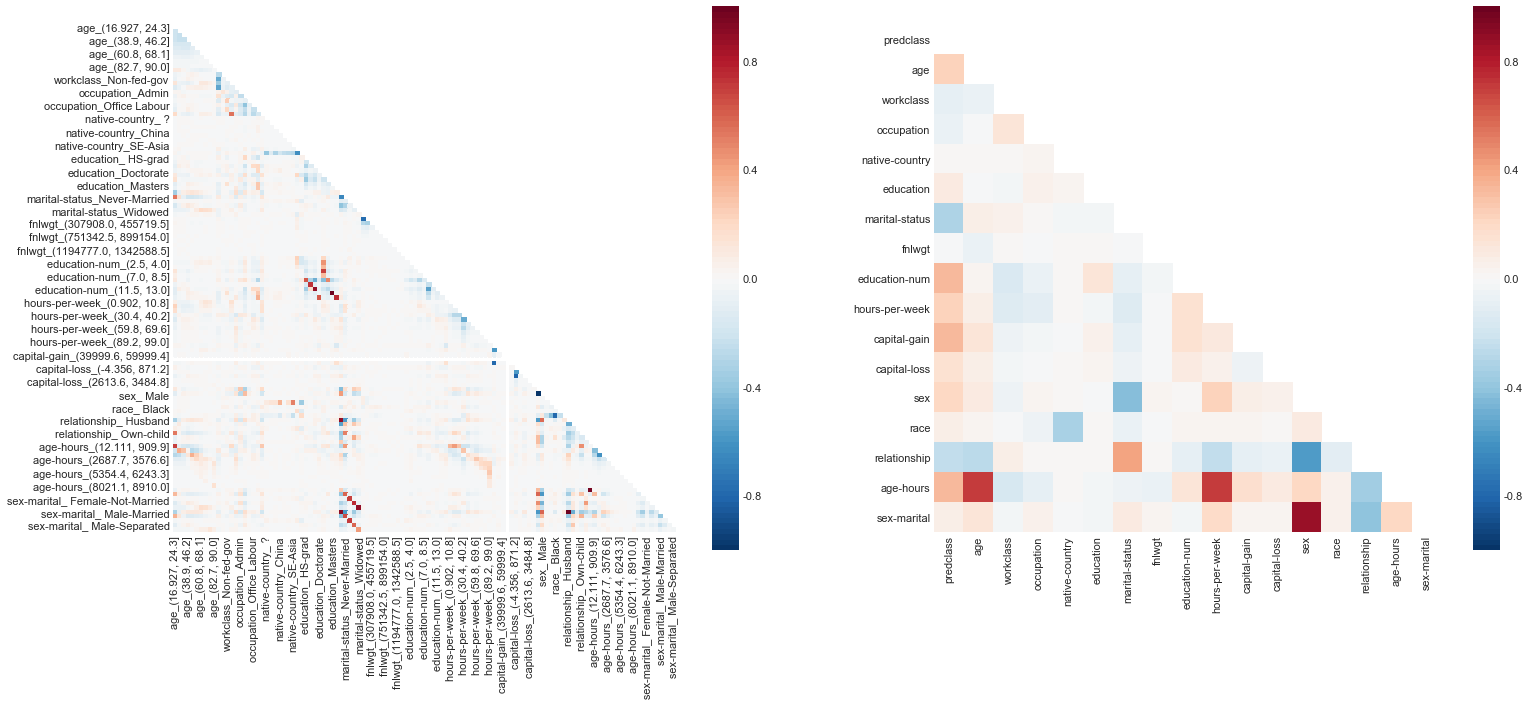

In [41]:

plt.figure(figsize=(25,10))
plt.subplot(121)
mask = np.zeros_like(dataset_bin_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=dataset_bin_enc.corr(),cmap=sns.color_palette("RdBu_r",100),square=True,mask=mask,vmin=-1, vmax=1)

plt.subplot(122)
mask = np.zeros_like(dataset_con_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=dataset_con_enc.corr(),cmap=sns.color_palette("RdBu_r",100),square=True,mask=mask,vmin=-1, vmax=1)

### 特征重要性

可以基于随机森林来进行特征重要性的评估,所以用labelencode后编码结果去处理

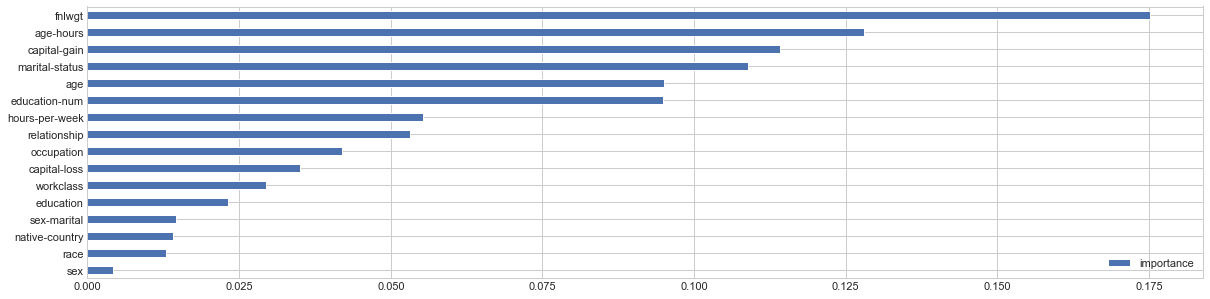

In [42]:
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()
r.fit(X=dataset_con_enc.drop('predclass',axis=1),y=dataset_con_enc.predclass)
importance = r.feature_importances_
rs = pd.DataFrame(data=importance,index=dataset_con_enc.drop('predclass',axis=1).columns,columns=['importance'])
rs.sort_values(by='importance').plot(kind='barh',figsize=(20,5))

### PCA

到底降不降维？没有一个固定的说法，在机器学习中没有说一个算法一个方案就一定对的，我们需要尝试

涉及参数：
- n_components：这个参数可以帮我们指定希望PCA降维后的特征维度数目。最常用的做法是直接指定降维到的维度数目，此时n_components是一个大于等于1的整数。当然，我们也可以指定主成分的方差和所占的最小比例阈值，让PCA类自己去根据样本特征方差来决定降维到的维度数，此时n_components是一个（0，1]之间的数

- whiten ：判断是否进行白化。所谓白化，就是对降维后的数据的每个特征进行归一化，让方差都为1.对于PCA降维本身来说，一般不需要白化。如果你PCA降维后有后续的数据处理动作，可以考虑白化。默认值是False，即不进行白化。 

- 除了这些输入参数外，有两个PCA类的成员值得关注。第一个是explained_variance_，它代表降维后的各主成分的方差值。方差值越大，则说明越是重要的主成分。第二个是explained_variance_ratio_，它代表降维后的各主成分的方差值占总方差值的比例，这个比例越大，则越是重要的主成分。

<BarContainer object of 12 artists>

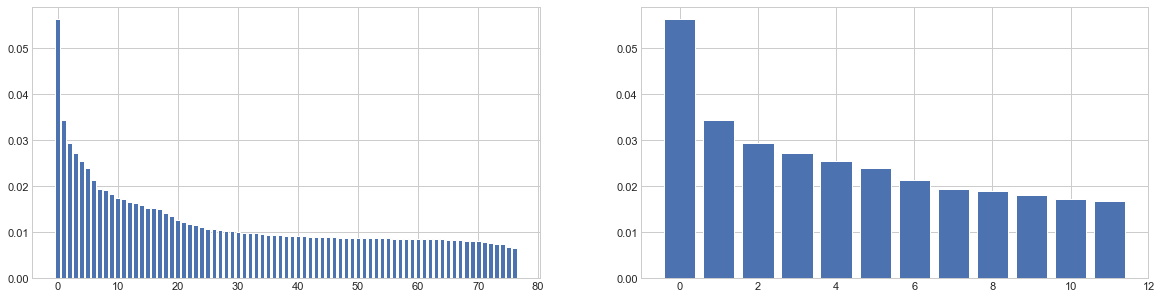

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler().fit(X=dataset_bin_enc.drop('predclass',axis=1))
X = scaler.transform(X=dataset_bin_enc.drop('predclass',axis=1))
fit1  = PCA( n_components= len(dataset_bin_enc.columns)-40)
fit1.fit(X )

fit2  = PCA( n_components= len(dataset_con_enc.columns)-5)
fit2.fit(X )

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.bar(range(0,fit1.explained_variance_ratio_.size),fit1.explained_variance_ratio_)
plt.subplot(122)
plt.bar(range(0,fit2.explained_variance_ratio_.size),fit2.explained_variance_ratio_)

Text(0.5, 0, '3rd eigenvector')

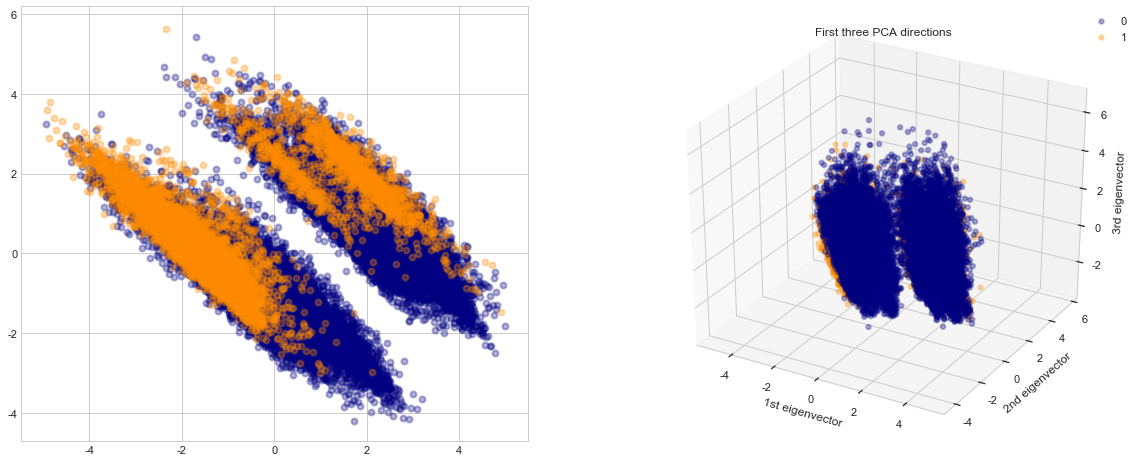

In [46]:
#### PCA's components graphed in 2D and 3D
#### Apply Scaling 

std_scale = StandardScaler().fit(dataset_con_enc.drop('predclass', axis=1))
X = std_scale.transform(dataset_con_enc.drop('predclass', axis=1))
y = dataset_con_enc['predclass']

# Formatting
target_names = [0,1]
colors = ['navy','darkorange']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
#     根据标签为0和标签为1
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")



### 递归特征消除

* 递归特征消除的主要思想是反复的构建模型（如SVM或者回归模型）然后选出最好的（或者最差的）的特征（可以根据系数来选），把选出来的特征放到一遍，然后在剩余的特征上重复这个过程，直到所有特征都遍历了。这个过程中特征被消除的次序就是特征的排序。因此，这是一种寻找最优特征子集的贪心算法。

In [ ]:
# Calculating RFE for non-discretised dataset, and graphing the Importance for each feature, per dataset
selector1 = RFECV(LogisticRegression(), step=1, cv=5, n_jobs=-1)
selector1 = selector1.fit(dataset_con_enc.drop('predclass', axis=1).values, dataset_con_enc['predclass'].values)
print("Feature Ranking For Non-Discretised: %s" % selector1.ranking_)
print("Optimal number of features : %d" % selector1.n_features_)
# Plot number of features VS. cross-validation scores
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
plt.xlabel("Number of features selected - Non-Discretised")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector1.grid_scores_) + 1), selector1.grid_scores_);

# Feature space could be subsetted like so:
# np.insert(selector1.support_, 0, True) 这里把第一列构造出来
dataset_con_enc = dataset_con_enc[dataset_con_enc.columns[np.insert(selector1.support_, 0, True)]]

## 选择不同的编码数据集
分别尝试下不同机器学习算法的效果

In [47]:
# OPTIONS: 
# - dataset_bin_enc
# - dataset_con_enc


selected_dataset = dataset_con_enc
selected_dataset.head(2)

,predclass,age,workclass,occupation,native-country,education,marital-status,fnlwgt,education-num,hours-per-week,capital-gain,capital-loss,sex,race,relationship,age-hours,sex-marital
0,0,22,0,0,0,2,1,3461,12,39,27,0,1,4,1,695,6
1,0,33,1,1,0,2,0,3788,12,12,0,0,1,4,0,334,5


In [48]:
## 数据集切分
train = selected_dataset.loc[0:32560,:]
test = selected_dataset.loc[32560:,:]
# Given missing fields are a small percentange of the overall dataset, 
# we have chosen to delete them.
train = train.dropna(axis=0)
test = test.dropna(axis=0)
# 重命名
X_train_w_label = train
X_train = train.drop(['predclass'], axis=1)
y_train = train['predclass'].astype('int64')
X_test  = test.drop(['predclass'], axis=1)
y_test  = test['predclass'].astype('int64')

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 16 columns):
age               32561 non-null int64
workclass         32561 non-null int64
occupation        32561 non-null int64
native-country    32561 non-null int64
education         32561 non-null int32
marital-status    32561 non-null int32
fnlwgt            32561 non-null int64
education-num     32561 non-null int64
hours-per-week    32561 non-null int64
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
sex               32561 non-null int32
race              32561 non-null int32
relationship      32561 non-null int32
age-hours         32561 non-null int64
sex-marital       32561 non-null int32
dtypes: int32(6), int64(10)
memory usage: 3.5 MB


In [49]:
import random
# Setting a random seed will guarantee we get the same results 
# every time we run our training and testing.
random.seed(1)

### 机器学习算法



- KNN
- Logistic Regression
- Random Forest
- Naive Bayes
- Stochastic Gradient Decent
- Linear SVC
- Decision Tree
- Gradient Boosted Trees

在sklearn中有很多通用函数，可以自定义一套方案

In [69]:
# 在不同阈值上计算fpr
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [52]:
# 返回结果
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [53]:
# Logistic Regression - Random Search for Hyperparameters

# Utility function to report best scores
import time
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 106.70 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.796 (std: 0.001)
Parameters: {'penalty': 'l2', 'intercept_scaling': 1.0211767307148465e-09, 'class_weight': None, 'C': 1.759642903825058e-06}

Model with rank: 2
Mean validation score: 0.777 (std: 0.004)
Parameters: {'penalty': 'l1', 'intercept_scaling': 3.6329215991564104e-18, 'class_weight': 'balanced', 'C': 365221.4325520261}

Model with rank: 2
Mean validation score: 0.777 (std: 0.004)
Parameters: {'penalty': 'l1', 'intercept_scaling': 54371778293949.305, 'class_weight': 'balanced', 'C': 2.419571018100995e+17}

Model with rank: 4
Mean validation score: 0.777 (std: 0.004)
Parameters: {'penalty': 'l2', 'intercept_scaling': 9.644915560865734e-18, 'class_weight': 'balanced', 'C': 41625737024635.56}

Model with rank: 5
Mean validation score: 0.777 (std: 0.004)
Parameters: {'penalty': 'l2', 'intercept_scaling': 1.6033210780283052e-10, 'class_weight': 'balanced', 'C': 2

In [54]:
# Logistic Regression
import datetime
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 83.2
Accuracy CV 10-Fold: 82.84
Running Time: 0:00:03.267689


In [55]:
print (metrics.classification_report(y_train, train_pred_log))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     24720
           1       0.71      0.49      0.58      7841

    accuracy                           0.83     32561
   macro avg       0.78      0.71      0.73     32561
weighted avg       0.82      0.83      0.82     32561



In [56]:
print (metrics.classification_report(y_test, test_pred_log))

              precision    recall  f1-score   support

           0       0.86      0.94      0.89     12435
           1       0.71      0.49      0.58      3847

    accuracy                           0.83     16282
   macro avg       0.78      0.72      0.74     16282
weighted avg       0.82      0.83      0.82     16282



[0.         0.         0.         ... 0.99284278 0.99284278 1.        ] [0.00000000e+00 2.59942813e-04 3.30127372e-02 ... 9.99740057e-01
 1.00000000e+00 1.00000000e+00] [1.99356261e+00 9.93562614e-01 9.72060527e-01 ... 7.36543404e-04
 7.35427300e-04 1.95939527e-06]
0.8644797396683708


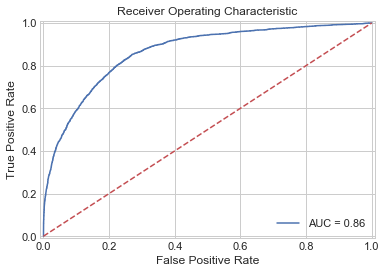

In [59]:
plot_roc_curve(y_test, probs_log)

In [62]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))


Accuracy: 75.28
Accuracy CV 10-Fold: 74.95
Running Time: 0:00:03.201513


In [63]:
print (metrics.classification_report(y_train, train_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84     24720
           1       0.47      0.33      0.39      7841

    accuracy                           0.75     32561
   macro avg       0.64      0.61      0.62     32561
weighted avg       0.73      0.75      0.73     32561



In [64]:
print (metrics.classification_report(y_test, test_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85     12435
           1       0.47      0.32      0.38      3847

    accuracy                           0.75     16282
   macro avg       0.64      0.60      0.61     16282
weighted avg       0.73      0.75      0.74     16282



[0.         0.0159228  0.11443506 0.39059107 1.        ] [0.         0.09487913 0.3236288  0.68260983 1.        ] [2.         1.         0.66666667 0.33333333 0.        ]
0.6730075989635316


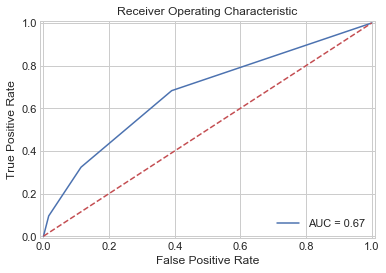

In [65]:
plot_roc_curve(y_test, probs_knn)

In [66]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 81.46
Accuracy CV 10-Fold: 81.97
Running Time: 0:00:03.472940


In [67]:
print (metrics.classification_report(y_train, train_pred_gaussian))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     24720
           1       0.65      0.55      0.60      7841

    accuracy                           0.82     32561
   macro avg       0.76      0.73      0.74     32561
weighted avg       0.81      0.82      0.81     32561



In [68]:
print (metrics.classification_report(y_test, test_pred_gaussian))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     12435
           1       0.63      0.53      0.58      3847

    accuracy                           0.81     16282
   macro avg       0.74      0.72      0.73     16282
weighted avg       0.81      0.81      0.81     16282



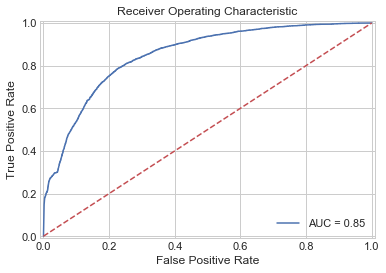

In [70]:
plot_roc_curve(y_test, probs_gau)

In [71]:
# Linear SVC
start_time = time.time()
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, _ = fit_ml_algo(LinearSVC(),
                                                                                           X_train, 
                                                                                           y_train,
                                                                                           X_test, 
                                                                                           10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 48.16
Accuracy CV 10-Fold: 58.55
Running Time: 0:00:31.470111


In [72]:
print (metrics.classification_report(y_train, train_pred_svc))

              precision    recall  f1-score   support

           0       0.81      0.60      0.69     24720
           1       0.30      0.56      0.39      7841

    accuracy                           0.59     32561
   macro avg       0.56      0.58      0.54     32561
weighted avg       0.69      0.59      0.61     32561



In [73]:
print (metrics.classification_report(y_test, test_pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.37      0.52     12435
           1       0.29      0.83      0.43      3847

    accuracy                           0.48     16282
   macro avg       0.58      0.60      0.48     16282
weighted avg       0.74      0.48      0.50     16282



In [74]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, _ = fit_ml_algo(SGDClassifier(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 78.56
Accuracy CV 10-Fold: 77.6
Running Time: 0:00:06.783388


In [75]:
print (metrics.classification_report(y_train, train_pred_sgd))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     24720
           1       0.57      0.28      0.38      7841

    accuracy                           0.78     32561
   macro avg       0.69      0.61      0.62     32561
weighted avg       0.75      0.78      0.75     32561



In [76]:
print (metrics.classification_report(y_test, test_pred_sgd))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     12435
           1       0.57      0.38      0.45      3847

    accuracy                           0.79     16282
   macro avg       0.70      0.64      0.66     16282
weighted avg       0.77      0.79      0.77     16282



In [78]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 81.43
Accuracy CV 10-Fold: 80.7
Running Time: 0:00:01.151639


In [79]:
print (metrics.classification_report(y_train, train_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     24720
           1       0.60      0.61      0.60      7841

    accuracy                           0.81     32561
   macro avg       0.74      0.74      0.74     32561
weighted avg       0.81      0.81      0.81     32561



In [80]:
print (metrics.classification_report(y_test, test_pred_dt)) 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12435
           1       0.61      0.61      0.61      3847

    accuracy                           0.81     16282
   macro avg       0.74      0.74      0.74     16282
weighted avg       0.81      0.81      0.81     16282



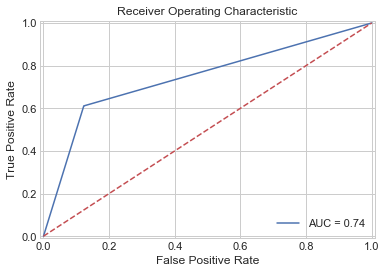

In [81]:
plot_roc_curve(y_test, probs_dt)

In [82]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 2.98 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.860 (std: 0.003)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.859 (std: 0.004)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 11}

Model with rank: 3
Mean validation score: 0.859 (std: 0.003)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 8, 'min_samples_split': 12}

Model with rank: 4
Mean validation score: 0.858 (std: 0.004)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 6, 'min_samples_split': 6}

Model with rank: 5
Mean validation score: 0.857 (std: 0.001)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max

In [83]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 85.74
Accuracy CV 10-Fold: 85.66
Running Time: 0:00:03.494351


In [84]:
print (metrics.classification_report(y_train, train_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     24720
           1       0.74      0.62      0.67      7841

    accuracy                           0.86     32561
   macro avg       0.81      0.78      0.79     32561
weighted avg       0.85      0.86      0.85     32561



In [85]:
print (metrics.classification_report(y_test, test_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     12435
           1       0.74      0.61      0.67      3847

    accuracy                           0.86     16282
   macro avg       0.81      0.77      0.79     16282
weighted avg       0.85      0.86      0.85     16282



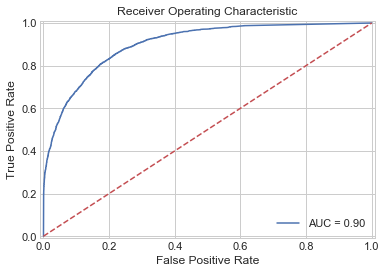

In [86]:
plot_roc_curve(y_test, probs_rf)

In [87]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.62
Accuracy CV 10-Fold: 86.49
Running Time: 0:00:12.846922


In [88]:
print (metrics.classification_report(y_train, train_pred_gbt))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     24720
           1       0.78      0.61      0.68      7841

    accuracy                           0.86     32561
   macro avg       0.83      0.78      0.80     32561
weighted avg       0.86      0.86      0.86     32561



In [89]:
print (metrics.classification_report(y_test, test_pred_gbt)) 

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     12435
           1       0.78      0.60      0.68      3847

    accuracy                           0.87     16282
   macro avg       0.83      0.77      0.80     16282
weighted avg       0.86      0.87      0.86     16282



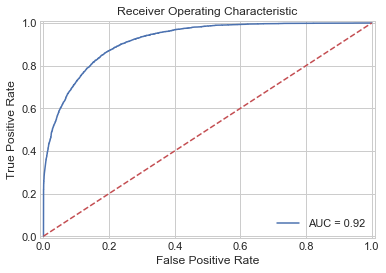

In [90]:
plot_roc_curve(y_test, probs_gbt)

## Ranking Results

Let's rank the results for all the algorithms we have used

In [91]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Gradient Boosting Trees,86.62
2,Random Forest,85.74
1,Logistic Regression,83.20
3,Naive Bayes,81.46
6,Decision Tree,81.43
4,Stochastic Gradient Decent,78.56
0,KNN,75.28
5,Linear SVC,48.16


In [92]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,     
        acc_cv_rf, 
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Gradient Boosting Trees,86.49
2,Random Forest,85.66
1,Logistic Regression,82.84
3,Naive Bayes,81.97
6,Decision Tree,80.70
4,Stochastic Gradient Decent,77.60
0,KNN,74.95
5,Linear SVC,58.55


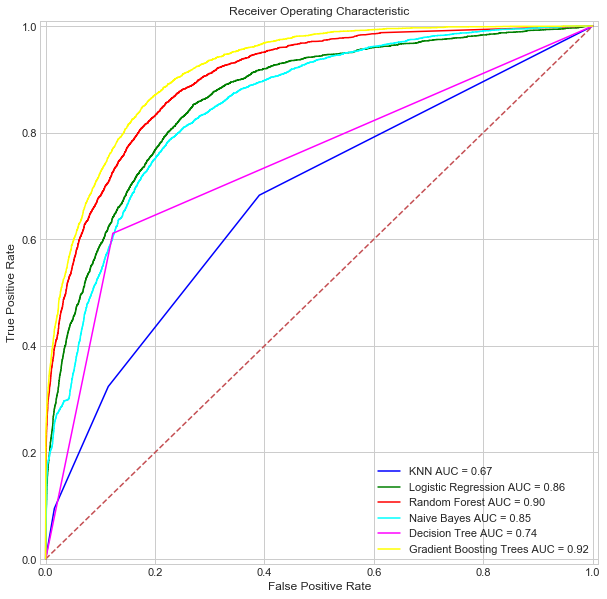

In [93]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10)) 

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Trees'
]
probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbt
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
]
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()